### Assignment 2: Cleaning and Preparing an E-Commerce Customer Reviews Dataset
Objective:
To clean and prepare a dataset containing customer reviews and ratings of e-commerce products.
Instructions:
Load the dataset containing customer reviews, ratings, and feedback.
Handle missing values:
Identify missing values in Review_Text, Rating, and Customer_Age.
Impute missing numerical values using appropriate techniques.
Use NLP-based techniques to handle missing textual data.
Detect and remove duplicates:
Use duplicated() to find repeated reviews.
Remove or merge duplicate records.
Handle inconsistent data:
Standardize Rating values (ensure they range between 1-5).
Correct spelling inconsistencies in Product_Category.
Identify and handle outliers:
Use boxplots to find anomalies in Product_Price and Rating.
Apply transformation techniques if necessary.
Prepare cleaned data for analysis:
Convert categorical data into numerical format where required.
Save the final cleaned dataset as a CSV file.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          505 non-null    int64  
 1   Product_Category  505 non-null    object 
 2   Product_Price     505 non-null    float64
 3   Customer_Age      505 non-null    float64
 4   Rating            505 non-null    float64
 5   Review_Text       505 non-null    object 
 6   Order_Date        505 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 27.7+ KB


C:\Users\shsva\AppData\Local\Temp\ipykernel_1040\3385304608.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Review_Text'].fillna("No review provided", inplace=True)
C:\Users\shsva\AppData\Local\Temp\ipykernel_1040\3385304608.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

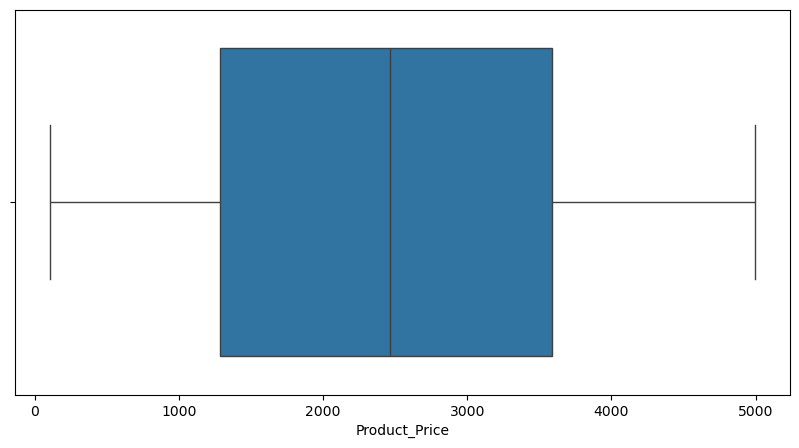

Data cleaning complete. File saved as 'E-Commerce_Data.csv'


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
# Load dataset
df = pd.read_csv("E-Commerce_Data.csv")

# Display basic info
df.info()

# Handle missing values
# Fill missing Review_Text with "No review provided"
df['Review_Text'].fillna("No review provided", inplace=True)

# Impute missing numerical values
num_imputer = SimpleImputer(strategy='median')
df['Customer_Age'] = num_imputer.fit_transform(df[['Customer_Age']])
df['Rating'] = df['Rating'].fillna(df['Rating'].mode()[0])  # Fill with mode
df['Product_Price'] = df['Product_Price'].fillna(df['Product_Price'].median())

# Forward Fill for date-related fields
df['Order_Date'].fillna(method='ffill', inplace=True)

# Detect and remove duplicates
df.drop_duplicates(inplace=True)

# Handle inconsistent data
# Ensure Rating values are between 1-5
df['Rating'] = np.clip(df['Rating'], 1, 5)


# Identify and handle outliers
# Boxplot for detecting anomalies
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Product_Price'])
plt.show()

# Removing extreme outliers using IQR
Q1 = df['Product_Price'].quantile(0.25)
Q3 = df['Product_Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Product_Price'] >= lower_bound) & (df['Product_Price'] <= upper_bound)]

# Prepare data for analysis
# Convert categorical data into numerical format
encoder = LabelEncoder()
df['Product_Category'] = encoder.fit_transform(df['Product_Category'])

# Save cleaned data
df.to_csv("E-Commerce_Data.csv", index=False)
print("Data cleaning complete. File saved as 'E-Commerce_Data.csv'")
